### Gabriel Saraiva Espeschit

In [1]:
import pandas as pd
import numpy as np
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
from numpy import matmul
from numpy.linalg import inv, det
from sklearn.cluster import KMeans as kmeans
mlbench = importr('mlbench')

In [211]:
def treinaRBF(xin, yin, p):
    
    ######### Função Radial Gaussiana #########
    #Definindo função para calcular a PDF
    def pdf_mv(x, m, K, n):
        if n == 1:
            r = np.sqrt(K)
            px = ((1/(np.sqrt(2*np.pi*r*r)))*np.exp(-0.5 * ((x-m)/(r))**2))
        else:
            parte1 = 1/(((2* np.pi)**(n)*(det(K))))
            parte2 = -0.5 * matmul(matmul((x-m).T, (inv(K))), (x-m))
            px = parte1*np.exp(parte2)
        return(px)

    ##################################################

    N = xin.shape[0] # Número de amostras
    n = xin.shape[1] # Dimensão de entrada

    xclust = kmeans(n_clusters=p).fit(xin) # Fazendo o Clustering com a função kmeans do sklearn

    # Armazena o centro dasd funções
    m = xclust.cluster_centers_
    covlist = []

    for i in range(p):
        xci = xin[xclust.labels_ == i]
        if n == 1:
            covi = np.var(xci.T)
        else:
            covi = np.cov(xci.T)
        covlist.append(covi)
    H = np.zeros((N, p))

    for j in range(N):
        for i in range(p):
            mi = np.array(m[i, :])
            cov = np.array(covlist[i])
            H[j, i] = pdf_mv(xin[j, :], mi, cov, n)

    Haug = np.append(np.ones((N,1)), H, axis = 1)
    W = matmul(np.linalg.pinv(Haug),(yin))

    return(m, covlist, W, H, xclust)

def YRBF(xin, modRBF):

    ######### Função Radial Gaussiana #########
    #Definindo função para calcular a PDF
    def pdf_mv(x, m, K, n):
        if n == 1:
            r = np.sqrt(K)
            px = ((1/(np.sqrt(2*np.pi*r*r)))*np.exp(-0.5 * ((x-m)/(r))**2))
        else:
            parte1 = 1/(((2* np.pi)**(n)*(det(K))))
            parte2 = -0.5 * matmul(matmul((x-m).T, (inv(K))), (x-m))
            px = parte1*np.exp(parte2)
        return(px)

    ##################################################

    N = xin.shape[0] # Número de amostras
    n = xin.shape[1] # Dimensão de entrada
    m = modRBF[0]
    covlist = modRBF[1]
    p = len(covlist)
    W = modRBF[2]

    H = np.zeros((N, p))

    for j in range(N):
        for i in range(p):
            mi = m[i, :]
            cov = covlist[i]
            H[j, i] = pdf_mv(xin[j, :], mi, cov, n)
    
    Haug = np.append(np.ones((N,1)), H, axis = 1)
    Yhat = matmul(Haug, W)

    return Yhat

In [212]:
xor = mlbench.mlbench_xor(100)
twod = mlbench.mlbench_2dnormals(200)
circles = mlbench.mlbench_circle(100)
spirals = mlbench.mlbench_spirals(100, sd=0.05)

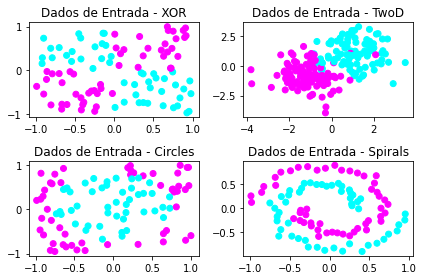

In [213]:
# Importando os Dados

xor_data, xor_class = np.array(xor[0]), np.array(xor[1])
twod_data,twod_class = np.array(twod[0]), np.array(twod[1])
circles_data, circles_class = np.array(circles[0]), np.array(circles[1])
spirals_data, spirals_class = np.array(spirals[0]), np.array(spirals[1])

f, (ax) = plt.subplots(2,2)

ax[0, 0].set_title('Dados de Entrada - XOR')
ax[0, 0].scatter(xor_data[:, 0], xor_data[:,1], c = xor_class, cmap = 'cool')

ax[0, 1].set_title('Dados de Entrada - TwoD')
ax[0, 1].scatter(twod_data[:, 0], twod_data[:,1], c = twod_class, cmap = 'cool')

ax[1, 0].set_title('Dados de Entrada - Circles')
ax[1, 0].scatter(circles_data[:, 0], circles_data[:,1], c = circles_class, cmap = 'cool')

ax[1, 1].set_title('Dados de Entrada - Spirals')
ax[1, 1].scatter(spirals_data[:, 0], spirals_data[:,1], c = spirals_class, cmap = 'cool')
f.tight_layout()
plt.show()

Encontrando a rede para função sinc  variando o valor de k = (2; 5 e 10) 

In [221]:
xin = np.linspace(-15, 15, 100).reshape(-1, 1)
yin = np.sin(xin) /xin +  np.random.uniform(low=0, high=0.05, size=(xin.shape[0], 1))
xrange = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)
num_clus = [1, 9, 10]

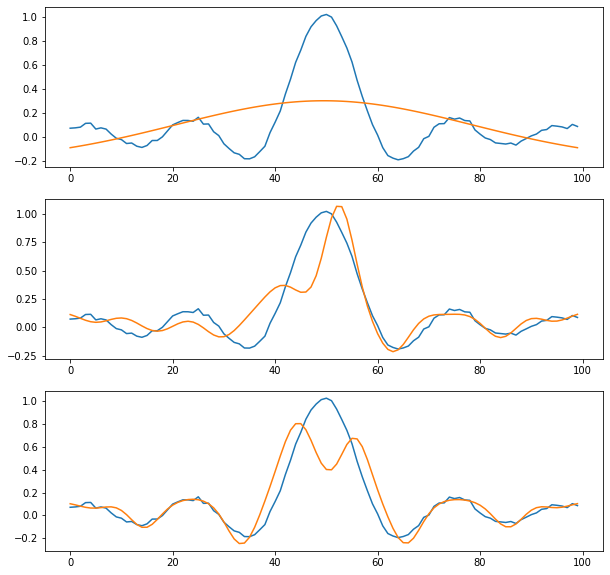

In [222]:
y_hat_test = []
modRBFsin = []
fig, axs = plt.subplots(3, figsize=(10,10))
for i, clus in enumerate(num_clus):
    modRBFsin.append(treinaRBF(xin, yin, clus))
    y_hat_test.append(YRBF(xin, modRBFsin[i]))
    axs[i].plot(yin)
    axs[i].plot(y_hat_test[i])
    #axs[i].plot(modRBFsin[i][0],'x')
plt.show()

Encontrando a rede para todos os dados importados variando o valor de k = (2; 5 e 10) 

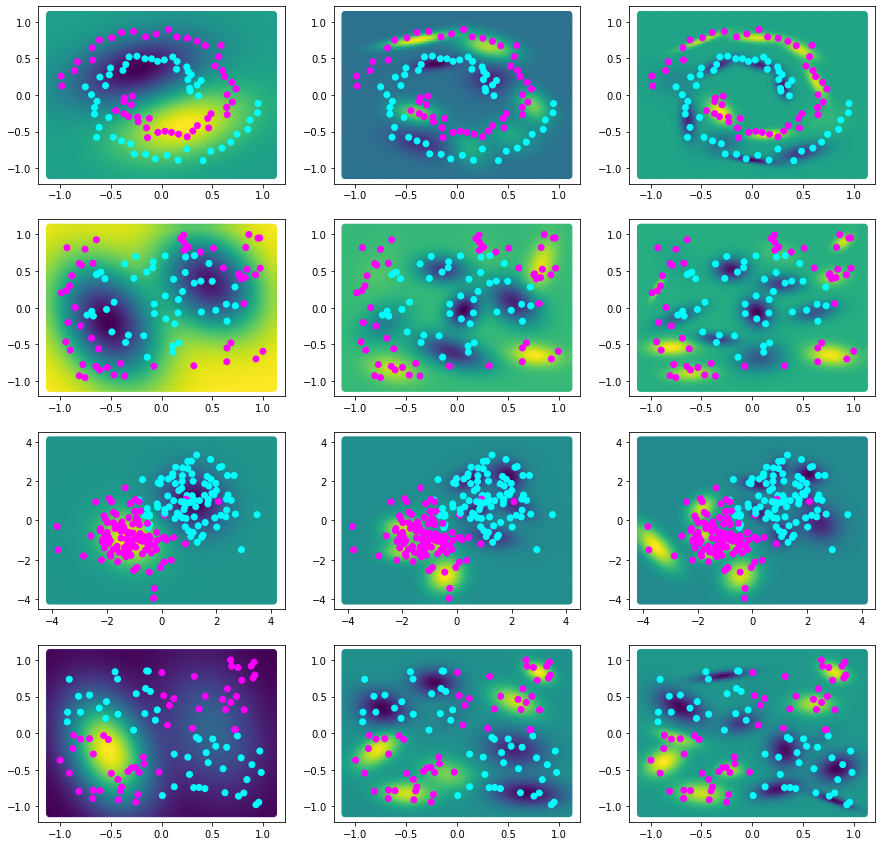

In [223]:
x1_lin = np.linspace(-1.1, 1.1, 100)
x2_lin = np.linspace(-1.1, 1.1, 100)
x1_2d = np.linspace(-4.1, 4.1, 100)
x2_2d = np.linspace(-4.1, 4.1, 100)
X1, X2 = np.meshgrid(x1_lin, x2_lin)
X1_2d, X2_2d = np.meshgrid(x1_2d, x2_2d)

X_lin = np.column_stack((X1.ravel(),X2.ravel()))
X_2d = np.column_stack((X1_2d.ravel(),X2_2d.ravel()))
modRBF_spirals = []
modRBF_circles = []
modRBF_2d = []
modRBF_xor = []
yhat_spirals = []
yhat_circles = []
yhat_2d = []
yhat_xor = []
fig, axs = plt.subplots(4,3, figsize = (15,15))
num_clus_2d = [2, 10, 15]

for i, clus in enumerate(num_clus_2d):
    modRBF_spirals.append(treinaRBF(spirals_data, spirals_class, clus))
    yhat_spirals.append(YRBF(X_lin, modRBF_spirals[i]))
    axs[0, i].scatter(X_lin[:, 0], X_lin[:, 1], c=yhat_spirals[i])
    axs[0, i].scatter(spirals_data[:, 0], spirals_data[:,1], c = spirals_class, cmap = 'cool')
    
    modRBF_circles.append(treinaRBF(circles_data, circles_class, clus))
    yhat_circles.append(YRBF(X_lin, modRBF_circles[i]))
    axs[1, i].scatter(X_lin[:, 0], X_lin[:, 1], c=yhat_circles[i])
    axs[1, i].scatter(circles_data[:, 0], circles_data[:,1], c = circles_class, cmap = 'cool')
    
    
    modRBF_2d.append(treinaRBF(twod_data, twod_class, clus))
    yhat_2d.append(YRBF(X_2d, modRBF_2d[i]))
    axs[2, i].scatter(X_2d[:, 0], X_2d[:, 1], c=yhat_2d[i])
    axs[2, i].scatter(twod_data[:, 0], twod_data[:,1], c = twod_class, cmap = 'cool')
    
    
    modRBF_xor.append(treinaRBF(xor_data, xor_class, clus))
    yhat_xor.append(YRBF(X_lin, modRBF_xor[i]))
    axs[3, i].scatter(X_lin[:, 0], X_lin[:, 1], c=yhat_xor[i])
    axs[3, i].scatter(xor_data[:, 0], xor_data[:,1], c = xor_class, cmap = 'cool')

plt.show()

Como podemos observar, houve um bug no desenvolvimento do código. Não foi possível encontrar esse bug dentro do prazo estipulado para entrega do trabalho. No entanto, optou-se pela entrega do exercício para que possa ser apurado os esforços para realização desse trabalho.